# Peafowl: show map requests

We are using the adaguc implementation of the OGC WebMapping interface by KNMI:
https://github.com/KNMI/adaguc-server

It has in addition a web-client to explore the available maps/datasets:
https://peafowl1.cloud.dkrz.de/

Check the `autowms` folder, select a netcdf dataset and click on the preview image below the autowms view.



## Run a getMap request using OWSLib

In [1]:
from owslib.wms import WebMapService
from owslib.util import Authentication

In [2]:
auth = Authentication(verify=False)

In [3]:
cmip6_tas = "tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_185001-186912.nc"
url = f"https://peafowl1.cloud.dkrz.de//adagucserver?source={cmip6_tas}&service=WMS&request=GetCapabilities"

wms = WebMapService(
    url,
    auth=auth
)

/Users/pingu/miniconda3/envs/clint-demo/lib/python3.12/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'peafowl1.cloud.dkrz.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [4]:
# GetMap (image/jpeg)
response = wms.getmap(
    layers=['tas'],
    srs='EPSG:4326',
    bbox=(-180,-90,180,90),
    size=(720,360),
    format='image/jpeg')

/Users/pingu/miniconda3/envs/clint-demo/lib/python3.12/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'peafowl1.cloud.dkrz.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [5]:
# store the map image
out = open('getmap-response.jpeg', 'wb')
out.write(response.read())
out.close()

# ... you can open the file from the current notebook folder

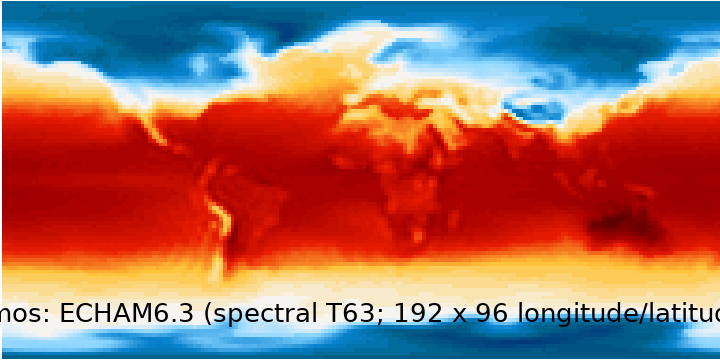

In [6]:
# show the map image

from IPython.display import Image

Image(filename ='getmap-response.jpeg')